## Explore the data regarding:
* ### Population and number of literate people by sex and age group: 1345-1385 census (1966-2006)
* ### Data source: http://irandataportal.syr.edu/education-2
* ### Numbers are in 1000 persons

In [1]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly  
plotly.offline.init_notebook_mode()
%matplotlib inline
matplotlib.rc(r'xtick', labelsize=30) 
matplotlib.rc(r'ytick', labelsize=30) 
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)
sns.set_palette('cubehelix')

In [2]:
file_name = 'Data/1.-population-and-number-of-literate-people-by-sex-and-age-group-1345-1385-census-1966-2006.xlsx'
data = pd.read_excel(file_name)

In [3]:
data.head()

,"1. POPULATION AND NUMBER OF LITERATE PEOPLE BY SEX AND AGE GROUP, 1345-1385 Census (1966-2006)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,(1000 persons),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex and age group,1345 Census (1966),NaN,1355 Census (1976),NaN,1365 Census (1986),NaN,1370 Census (1991),NaN,1375Census (1996),NaN,1385 Census (2006),NaN
3,NaN,Population,Literate,Population,Literate,Population,Literate,Population,Literate,Population,Literate,Population,Literate
4,Both sexes,19372,5556,27113,12877,38709,23913,45856,33966,52295,41582,63920,54082


In [4]:
data.iloc[6][2]  = 886; data.iloc[21][2] = 579; data.iloc[37][2] = 307;

In [5]:
census_yrs = ['1345', '1355', '1365', '1370','1375', '1385']
info_dict = dict()

info_dict['tot_pop'] = []
info_dict['lit_pop'] = []
row_interest = 4
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict['lit_pop'].append(data.iloc[row_interest][i])
    else:
        info_dict['tot_pop'].append(data.iloc[row_interest][i])
info_dict['tot_ilit'] = np.array(info_dict['tot_pop']) - np.array(info_dict['lit_pop'])

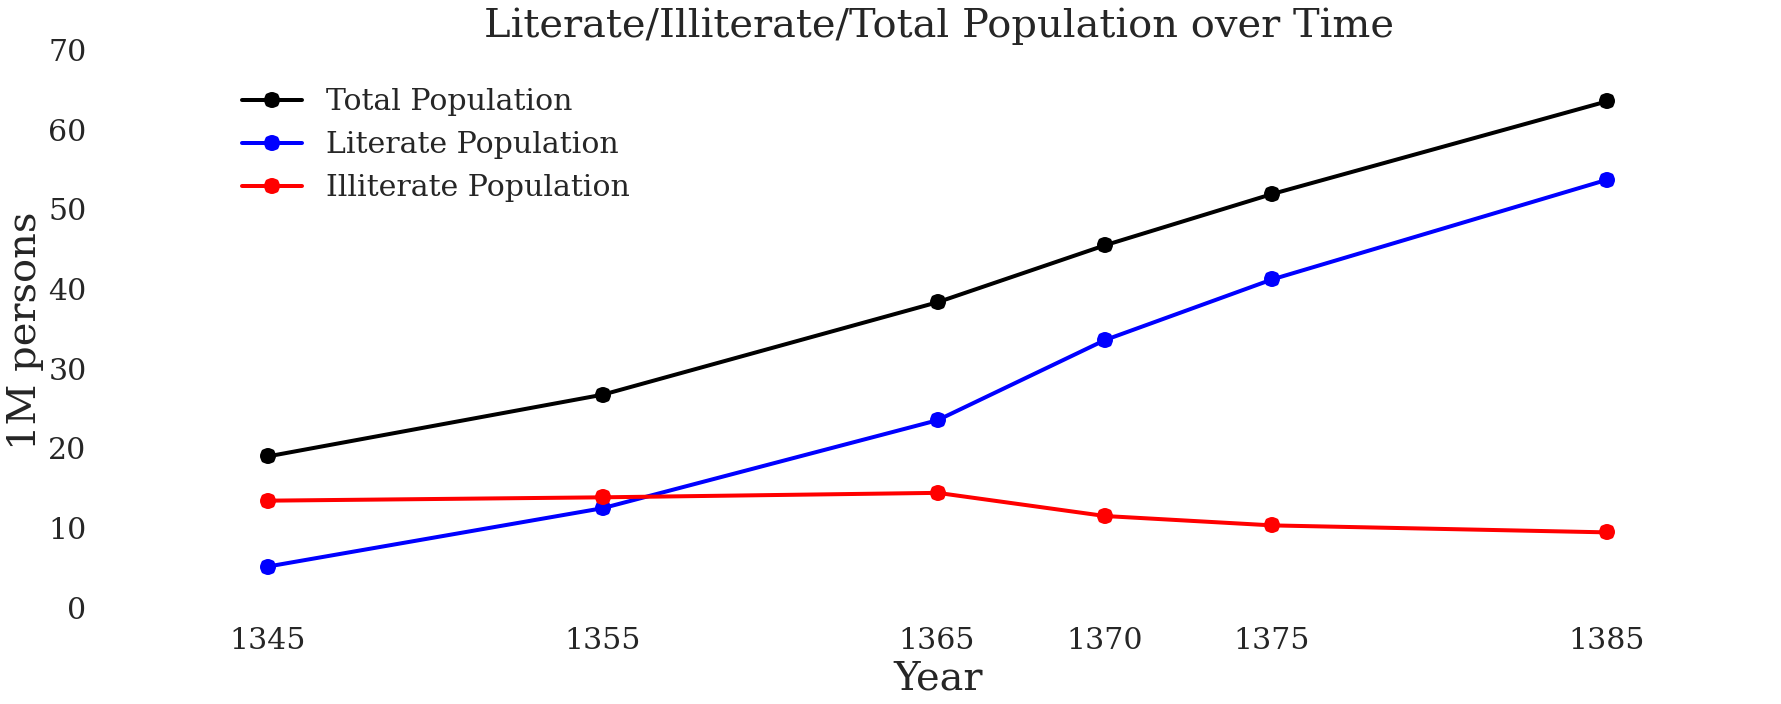

In [6]:
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'

fig01 = plt.figure(1, figsize=(30, 10), dpi=90)
ax01 = fig01.add_subplot(1,1,1)

ax01.plot(census_yrs, np.array(info_dict['tot_pop'])/1000.0,'-ko', lw=4, markersize=16, label='Total Population')
ax01.plot(census_yrs, np.array(info_dict['lit_pop'])/1000.0,'-bo', lw=4, markersize=16, label='Literate Population')
ax01.plot(census_yrs, (np.array(info_dict['tot_pop'])-np.array(info_dict['lit_pop']))/1000.0,'-ro', lw=4,
          markersize=16, label='Illiterate Population')


ax01.set_xlim([1340,1390])
major_ticks_x = [1345, 1355, 1365, 1370, 1375, 1385]
ax01.set_xticks(major_ticks_x) 
ax01.set_title('Literate/Illiterate/Total Population over Time', fontsize=40, y=1.02)
ax01.set_xlabel('Year', fontsize=40)
ax01.set_ylabel('1M persons', fontsize=40)
ax01.grid('on')
ax01.legend(loc='lower center', bbox_to_anchor=(0.2,0.7), borderpad=0.1, fontsize=30,fancybox=True, title='')
plt.show() 

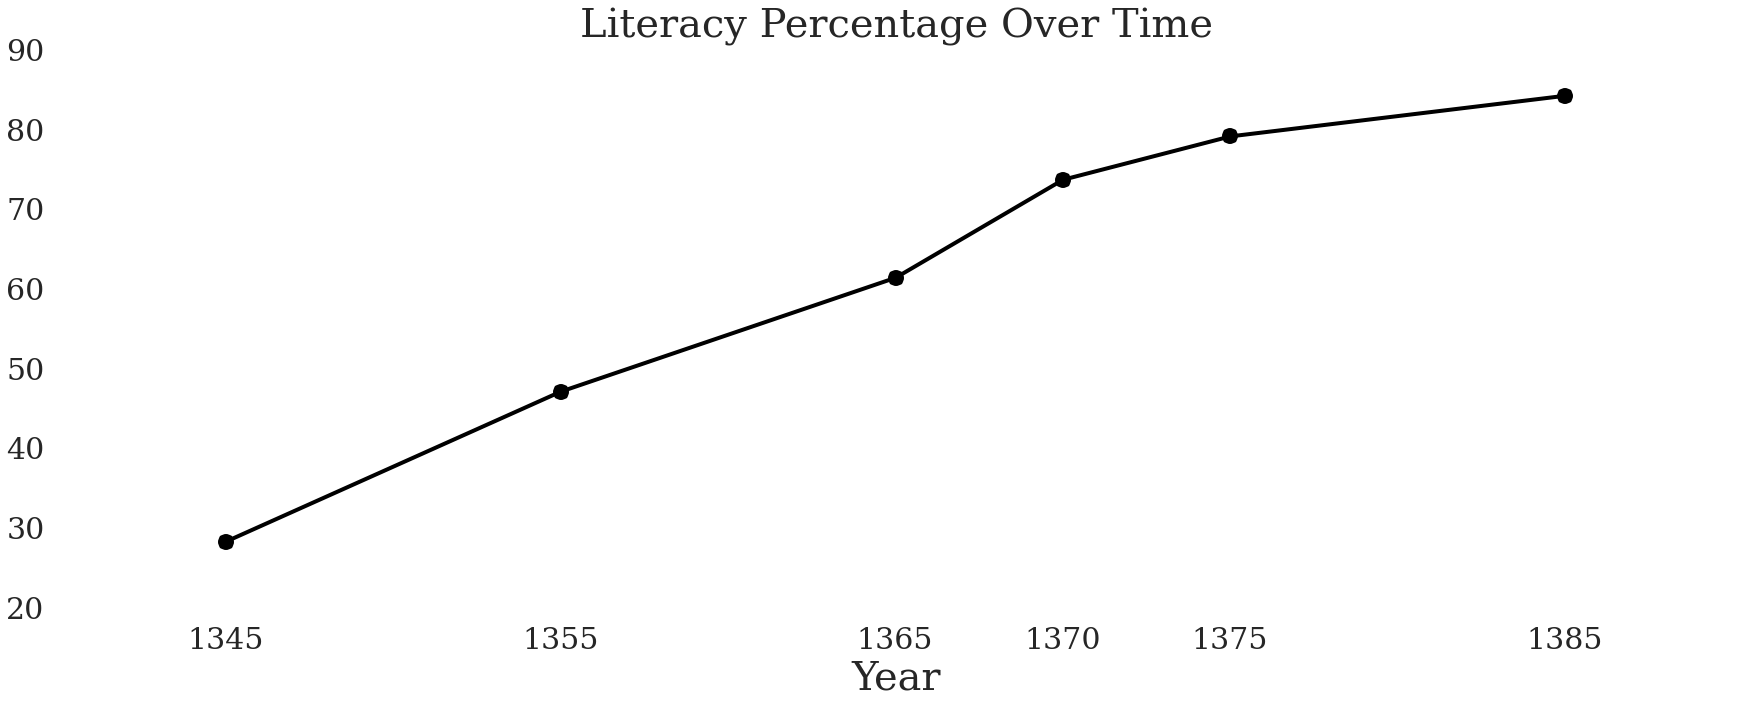

In [7]:
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'

fig01 = plt.figure(1, figsize=(30, 10), dpi=90)
ax01 = fig01.add_subplot(1,1,1)

lit_percentage = np.true_divide(np.array(info_dict['lit_pop']), np.array(info_dict['tot_pop'])) * 100
ax01.plot(census_yrs, lit_percentage,'-ko', lw=4, markersize=16)

ax01.set_xlim([1340,1390])
major_ticks_x = [1345, 1355, 1365, 1370, 1375, 1385]
ax01.set_xticks(major_ticks_x) 
ax01.set_title('Literacy Percentage Over Time', fontsize=40, y=1.02)
ax01.set_xlabel('Year', fontsize=40)
ax01.grid('on')
plt.show() 

In [8]:
var_name_tot = 'male_tot_pop'
var_name_lit = 'male_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 20
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
info_dict['male_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
var_name_tot = 'female_tot_pop'
var_name_lit = 'female_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 35
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
info_dict['female_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])

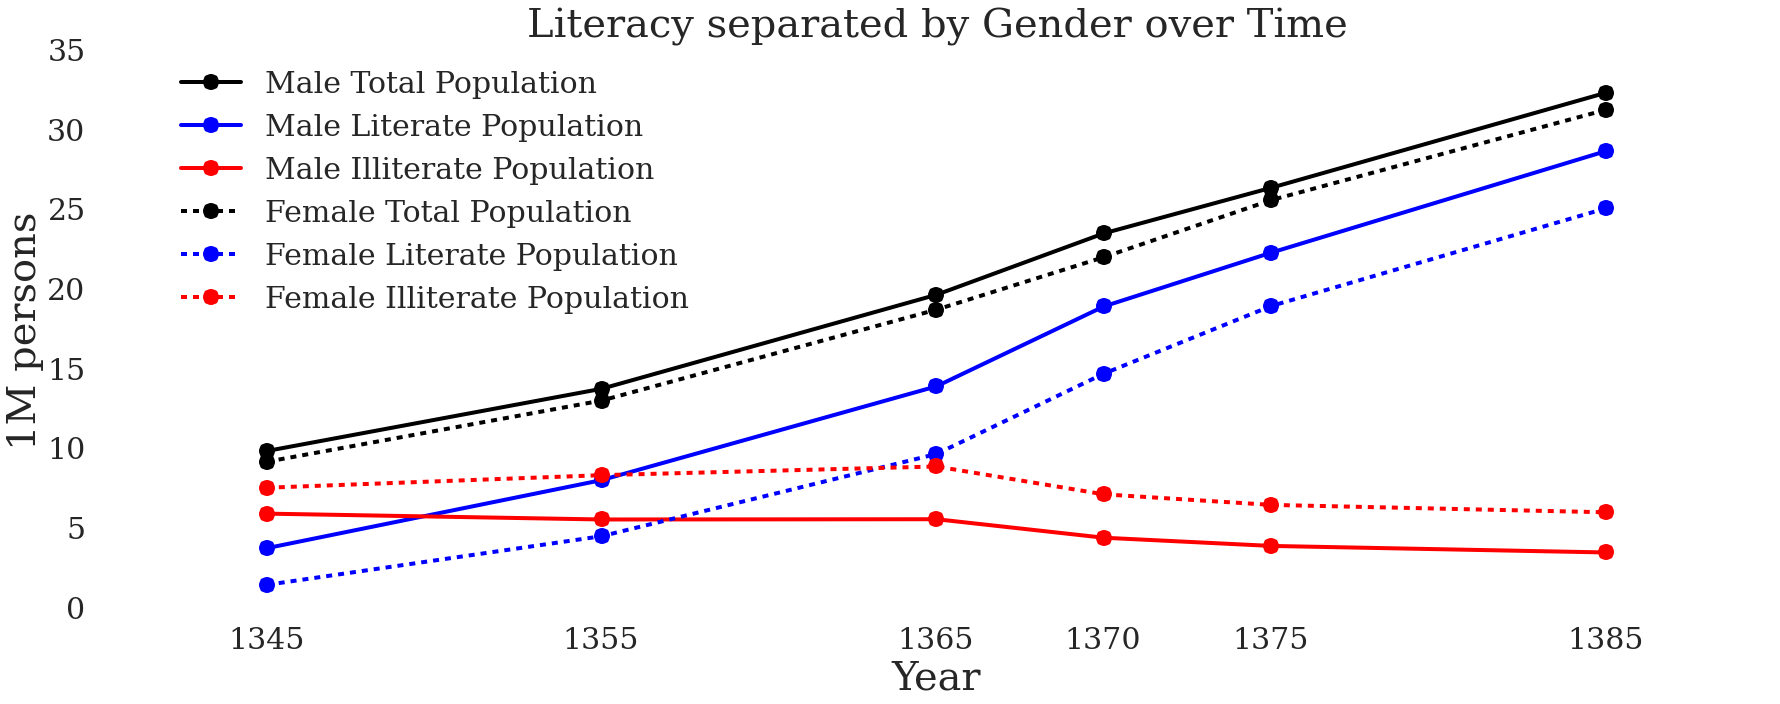

In [9]:
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'

fig01 = plt.figure(1, figsize=(30, 10), dpi=90)
ax01 = fig01.add_subplot(1,1,1)

ax01.plot(census_yrs, np.array(info_dict['male_tot_pop'])/1000.0,'-ko', lw=4,
          markersize=16, label='Male Total Population')
ax01.plot(census_yrs, np.array(info_dict['male_lit_pop'])/1000.0,'-bo', lw=4,
          markersize=16, label='Male Literate Population')
ax01.plot(census_yrs, (np.array(info_dict['male_tot_pop'])-np.array(info_dict['male_lit_pop']))/1000.0,'-ro', lw=4,
          markersize=16, label='Male Illiterate Population')

ax01.plot(census_yrs, np.array(info_dict['female_tot_pop'])/1000.0,'--ko', lw=4,
          markersize=16, label='Female Total Population')
ax01.plot(census_yrs, np.array(info_dict['female_lit_pop'])/1000.0,'--bo', lw=4,
          markersize=16, label='Female Literate Population')
ax01.plot(census_yrs, (np.array(info_dict['female_tot_pop'])-np.array(info_dict['female_lit_pop']))/1000.0,
          '--ro', lw=4,
          markersize=16, label='Female Illiterate Population')


ax01.set_xlim([1340,1390])
major_ticks_x = [1345, 1355, 1365, 1370, 1375, 1385]
ax01.set_xticks(major_ticks_x) 
ax01.set_title('Literacy separated by Gender over Time', fontsize=40, y=1.02)
ax01.set_xlabel('Year', fontsize=40)
ax01.set_ylabel('1M persons', fontsize=40)
ax01.grid('on')
ax01.legend(loc='lower center', bbox_to_anchor=(0.2,0.5), borderpad=0.1, fontsize=30,fancybox=True, title='')
plt.show() 

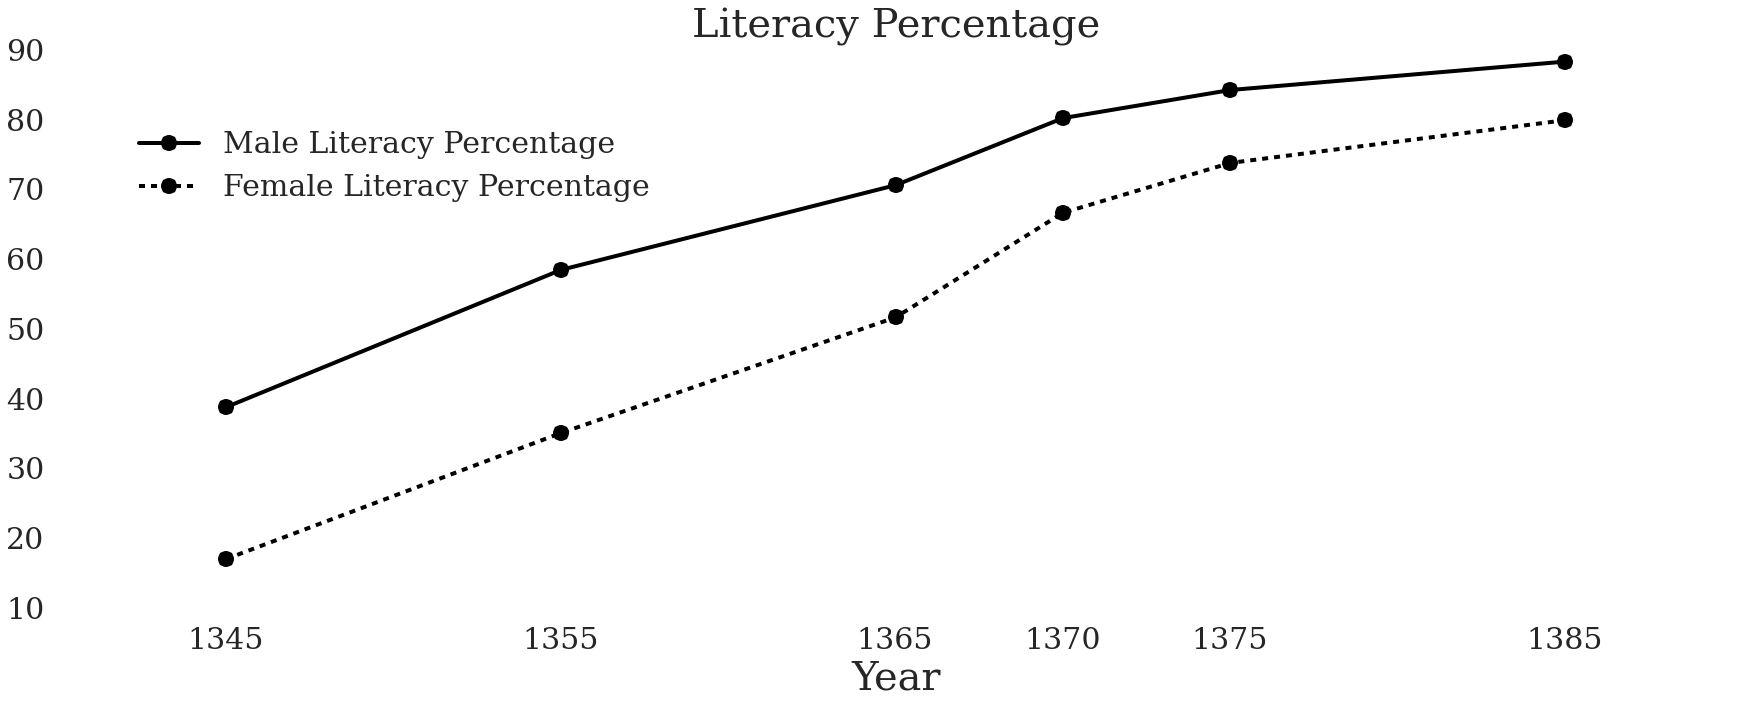

In [10]:
plt.rcParams['xtick.major.pad']='16'
plt.rcParams['ytick.major.pad']='16'

fig01 = plt.figure(1, figsize=(30, 10), dpi=90)
ax01 = fig01.add_subplot(1,1,1)

male_lit_percentage = np.true_divide(np.array(info_dict['male_lit_pop']),
                                     np.array(info_dict['male_tot_pop'])) * 100
female_lit_percentage = np.true_divide(np.array(info_dict['female_lit_pop']),
                                       np.array(info_dict['female_tot_pop'])) * 100
ax01.plot(census_yrs, male_lit_percentage,'-ko', lw=4, markersize=16, label='Male Literacy Percentage')
ax01.plot(census_yrs, female_lit_percentage,'--ko', lw=4, markersize=16, label='Female Literacy Percentage')

ax01.set_xlim([1340,1390])
major_ticks_x = [1345, 1355, 1365, 1370, 1375, 1385]
ax01.set_xticks(major_ticks_x) 
ax01.set_title('Literacy Percentage', fontsize=40, y=1.02)
ax01.set_xlabel('Year', fontsize=40)
ax01.grid('on')
ax01.legend(loc='lower center', bbox_to_anchor=(0.2,0.7), borderpad=0.1, fontsize=30,fancybox=True, title='')
plt.show() 

In [11]:
var_name_tot = '06To09_tot_pop'
var_name_lit = '06To09_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 6
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
#
info_dict[var_name_tot[0:6]+'_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
var_name_tot = '10To14_tot_pop'
var_name_lit = '10To14_lit_pop'
for i in xrange(7, 18):
    info_dict[var_name_tot] = []
    info_dict[var_name_lit] = []
    row_interest = i
    for i in xrange(1, len(data.iloc[row_interest])):
        if i%2 == 0:
            info_dict[var_name_lit].append(data.iloc[row_interest][i])
        else:
            info_dict[var_name_tot].append(data.iloc[row_interest][i])
    info_dict[var_name_tot[0:6]+'_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
    temp1 = str(int(var_name_lit[0:2]) + 5)
    temp2 = list(var_name_lit)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_lit[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_lit = temp2
    #
    temp1 = str(int(var_name_tot[0:2]) + 5)
    temp2 = list(var_name_tot)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_tot[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_tot = temp2
    #

var_name_tot = '65ToEnd_tot_pop'
var_name_lit = '65ToEnd_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 18
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
info_dict[var_name_tot[0:7]+'_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])

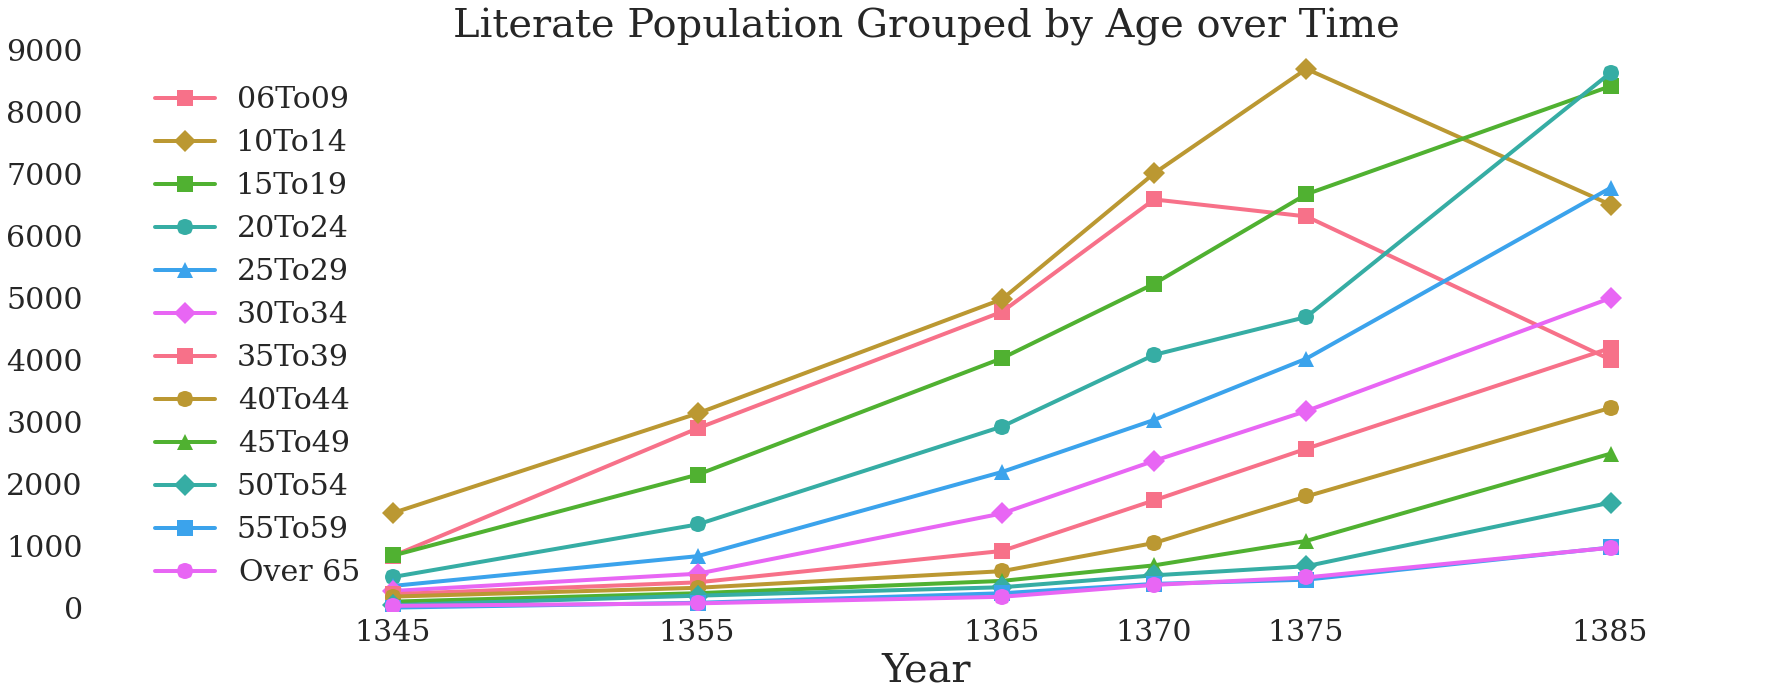

In [12]:
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
sns.set_palette("husl")
markers = ['o', '^', 'D', 's']

fig01 = plt.figure(1, figsize=(30, 10), dpi=90)
ax01 = fig01.add_subplot(1,1,1)

var_name_tot = '06To09_tot_pop'
var_name_lit = '06To09_lit_pop'

ax01.plot(census_yrs, info_dict[var_name_lit],'-o', lw=4, markersize=16, 
          marker=markers[(i-5)%4],label=var_name_tot[0:6])
#
var_name_tot = '10To14_tot_pop'
var_name_lit = '10To14_lit_pop'
for i in xrange(7, 17):
    ax01.plot(census_yrs, info_dict[var_name_lit],'-o', lw=4, markersize=16,
              marker=markers[(i-5)%4],label=var_name_tot[0:6])

    temp1 = str(int(var_name_lit[0:2]) + 5)
    temp2 = list(var_name_lit)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_lit[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_lit = temp2
    #
    temp1 = str(int(var_name_tot[0:2]) + 5)
    temp2 = list(var_name_tot)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_tot[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_tot = temp2
    #
i = 18
var_name_tot = '65ToEnd_tot_pop'
var_name_lit = '65ToEnd_lit_pop'

ax01.plot(census_yrs, info_dict[var_name_lit],'-o', lw=4, markersize=16,
          marker=markers[(i-6)%4],label='Over 65')
ax01.set_xlim([1335,1390])
major_ticks_x = [1345, 1355, 1365, 1370, 1375, 1385]
ax01.set_xticks(major_ticks_x) 
ax01.set_title('Literate Population Grouped by Age over Time', fontsize=40, y=1.02)
ax01.set_xlabel('Year', fontsize=40)
ax01.grid('on')
ax01.legend(loc='lower center', bbox_to_anchor=(0.1,0.01), borderpad=0.1, fontsize=30,fancybox=True, title='')

plt.show() 

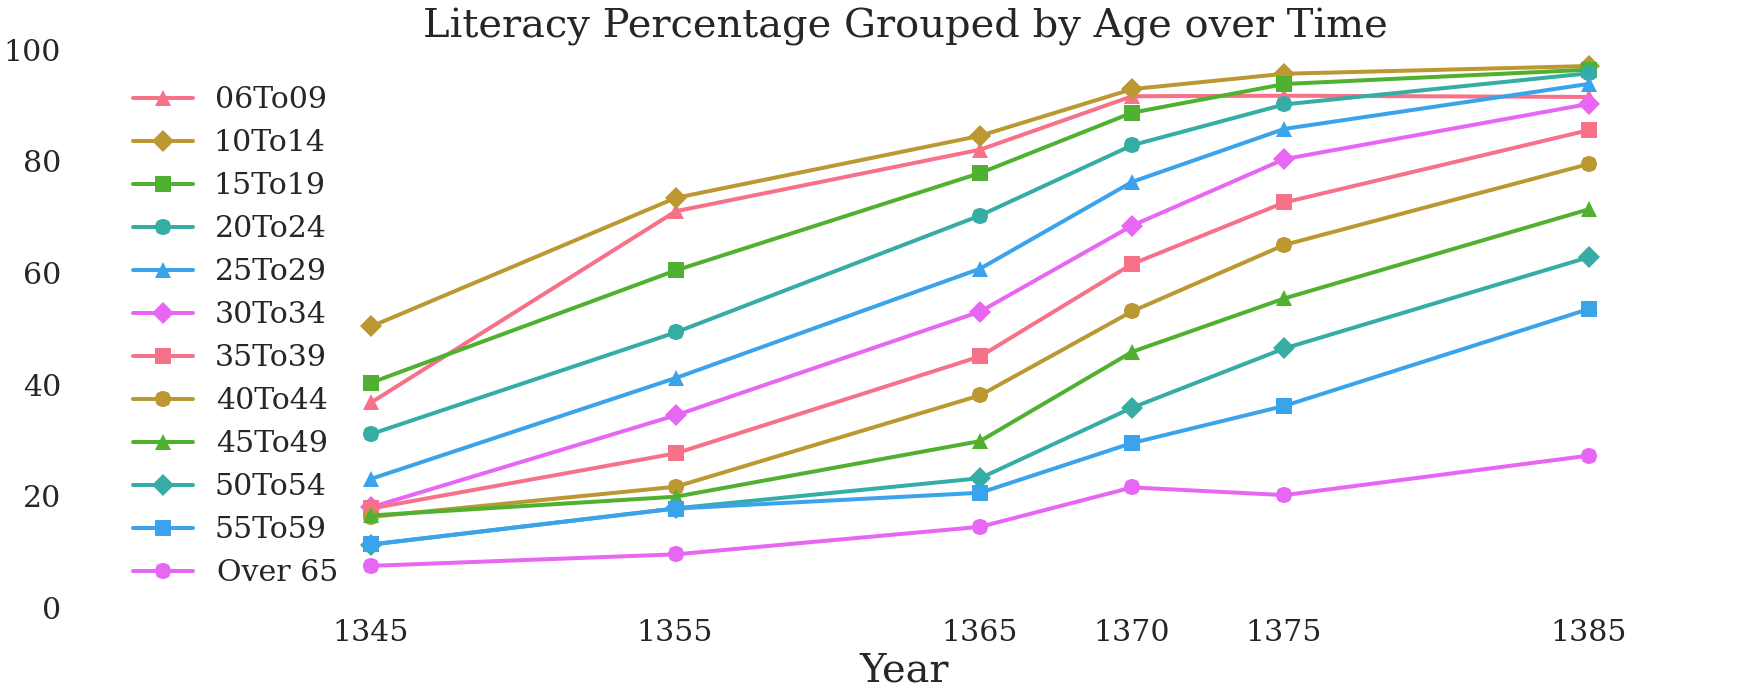

In [13]:
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
sns.set_palette("husl")
markers = ['o', '^', 'D', 's']

fig01 = plt.figure(1, figsize=(30, 10), dpi=90)
ax01 = fig01.add_subplot(1,1,1)

var_name_tot = '06To09_tot_pop'
var_name_lit = '06To09_lit_pop'
lit_percentage = np.true_divide(np.array(info_dict[var_name_lit]),
                                np.array(info_dict[var_name_tot])) * 100
ax01.plot(census_yrs, lit_percentage,'-o', lw=4, markersize=16, 
          marker=markers[(i-5)%4],label=var_name_tot[0:6])
#
var_name_tot = '10To14_tot_pop'
var_name_lit = '10To14_lit_pop'
for i in xrange(7, 17):
    lit_percentage = np.true_divide(np.array(info_dict[var_name_lit]),
                                np.array(info_dict[var_name_tot])) * 100
    ax01.plot(census_yrs, lit_percentage,'-o', lw=4, markersize=16,
              marker=markers[(i-5)%4],label=var_name_tot[0:6])

    temp1 = str(int(var_name_lit[0:2]) + 5)
    temp2 = list(var_name_lit)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_lit[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_lit = temp2
    #
    temp1 = str(int(var_name_tot[0:2]) + 5)
    temp2 = list(var_name_tot)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_tot[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_tot = temp2
    #
i = 18
var_name_tot = '65ToEnd_tot_pop'
var_name_lit = '65ToEnd_lit_pop'
lit_percentage = np.true_divide(np.array(info_dict[var_name_lit]),
                                np.array(info_dict[var_name_tot])) * 100
ax01.plot(census_yrs, lit_percentage,'-o', lw=4, markersize=16,
          marker=markers[(i-6)%4],label='Over 65')
ax01.set_xlim([1335,1390])
major_ticks_x = [1345, 1355, 1365, 1370, 1375, 1385]
ax01.set_xticks(major_ticks_x) 
ax01.set_title('Literacy Percentage Grouped by Age over Time', fontsize=40, y=1.02)
ax01.set_xlabel('Year', fontsize=40)
ax01.grid('on')
ax01.legend(loc='lower center', bbox_to_anchor=(0.1,0.01), borderpad=0.1, fontsize=30,fancybox=True, title='')

plt.show() 

In [14]:
 # run at the start of every notebook
plotly.offline.iplot({
    'data': [{'labels': ['Male', 'Female'],
              'values': [info_dict['male_tot_ilit'][-1], info_dict['female_tot_ilit'][-1]],
              'type': 'pie'}],
    'layout': {'title': '1385 Illiterate Population Gender Distribution (1000 persons)'}
})

In [15]:
labels = []
values = []
for key in info_dict.keys():
    if 'ilit' in key and 'To' in key:
        labels.append(key[0:6])
        values.append(info_dict[key][-1])
plotly.offline.iplot({
    'data': [{'labels': labels,
              'values': values,
              'type': 'pie'}],
    'layout': {'title': '1385 Illiterate Population Age Distribution (1000 persons)'}
})

In [16]:
var_name_tot = '06To09_male_tot_pop'
var_name_lit = '06To09_male_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 21
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
info_dict[var_name_tot[0:6]+'_male_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
#
var_name_tot = '10To14_male_tot_pop'
var_name_lit = '10To14_male_lit_pop'
for i in xrange(22, 33):
    info_dict[var_name_tot] = []
    info_dict[var_name_lit] = []
    row_interest = i
    for i in xrange(1, len(data.iloc[row_interest])):
        if i%2 == 0:
            info_dict[var_name_lit].append(data.iloc[row_interest][i])
        else:
            info_dict[var_name_tot].append(data.iloc[row_interest][i])
    info_dict[var_name_tot[0:6]+'_male_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
    temp1 = str(int(var_name_lit[0:2]) + 5)
    temp2 = list(var_name_lit)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_lit[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_lit = temp2
    #
    temp1 = str(int(var_name_tot[0:2]) + 5)
    temp2 = list(var_name_tot)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_tot[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_tot = temp2
    #

var_name_tot = '65ToEnd_male_tot_pop'
var_name_lit = '65ToEnd_male_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 33
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
info_dict[var_name_tot[0:7]+'_male_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])

In [17]:
labels = []
values = []
for key in info_dict.keys():
    if 'ilit' in key and 'To' in key and 'male' in key:
        labels.append(key[0:6])
        values.append(info_dict[key][-1])
plotly.offline.iplot({
    'data': [{'labels': labels,
              'values': values,
              'type': 'pie'}],
    'layout': {'title': '1385 Illiterate Male Population Age Distribution (1000 persons)'}
})

In [18]:
var_name_tot = '06To09_female_tot_pop'
var_name_lit = '06To09_female_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 37
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
#
info_dict[var_name_tot[0:6]+'_female_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
var_name_tot = '10To14_female_tot_pop'
var_name_lit = '10To14_female_lit_pop'
for i in xrange(38, 49):
    info_dict[var_name_tot] = []
    info_dict[var_name_lit] = []
    row_interest = i
    for i in xrange(1, len(data.iloc[row_interest])):
        if i%2 == 0:
            info_dict[var_name_lit].append(data.iloc[row_interest][i])
        else:
            info_dict[var_name_tot].append(data.iloc[row_interest][i])
    info_dict[var_name_tot[0:6]+'_female_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])
    temp1 = str(int(var_name_lit[0:2]) + 5)
    temp2 = list(var_name_lit)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_lit[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_lit = temp2
    #
    temp1 = str(int(var_name_tot[0:2]) + 5)
    temp2 = list(var_name_tot)
    temp2[0] = temp1[0]; temp2[1] = temp1[1]
    #
    Temp1 = str(int(var_name_tot[4:6]) + 5)
    temp2[4] = Temp1[0]; temp2[5] = Temp1[1]
    temp2 = ''.join(temp2)
    #
    var_name_tot = temp2
    #

var_name_tot = '65ToEnd_female_tot_pop'
var_name_lit = '65ToEnd_female_lit_pop'
info_dict[var_name_tot] = []
info_dict[var_name_lit] = []
row_interest = 49
for i in xrange(1, len(data.iloc[row_interest])):
    if i%2 == 0:
        info_dict[var_name_lit].append(data.iloc[row_interest][i])
    else:
        info_dict[var_name_tot].append(data.iloc[row_interest][i])
info_dict[var_name_tot[0:7]+'_female_tot_ilit'] = np.array(info_dict[var_name_tot]) - np.array(info_dict[var_name_lit])

In [19]:
labels = []
values = []
for key in info_dict.keys():
    if 'ilit' in key and 'To' in key and 'female' in key:
        labels.append(key[0:6])
        values.append(info_dict[key][-1])
plotly.offline.iplot({
    'data': [{'labels': labels,
              'values': values,
              'type': 'pie'}],
    'layout': {'title': '1385 Illiterate Female Population Age Distribution (1000 persons)'}
})